<a href="https://colab.research.google.com/github/thanhduc206/-AI---Fuzzy-logic/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.9 MB/s eta 0:00:00


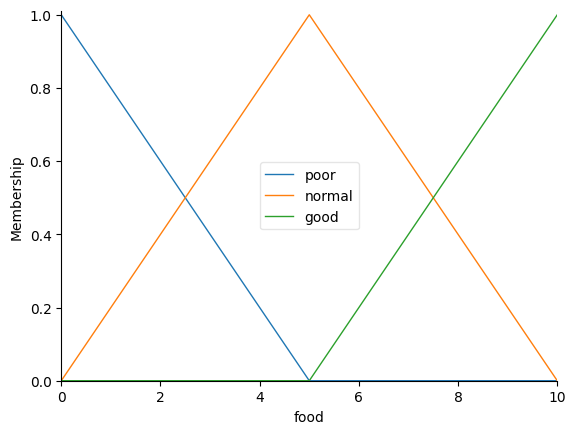

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')
service = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')
tip = ctrl.Consequent(np.arange(10, 25.1, 0.1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['normal'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 7])
service['normal'] = fuzz.trimf(service.universe, [0, 6, 10])
service['good'] = fuzz.trimf(service.universe, [7, 10, 10])

tip['poor'] = fuzz.trimf(tip.universe, [10, 10, 15])
tip['average'] = fuzz.trimf(tip.universe, [10, 17, 25])
tip['much'] = fuzz.trimf(tip.universe, [19, 25, 25])

food.view()



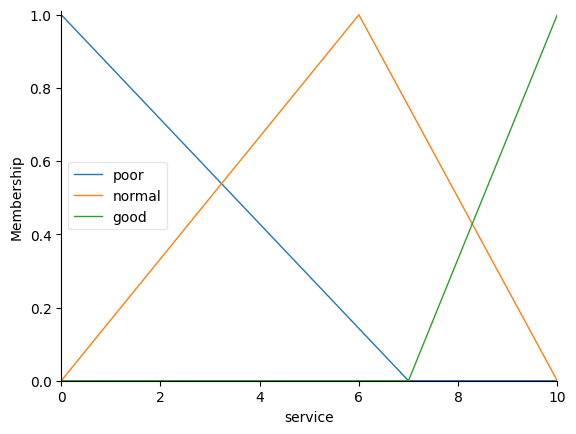

In [ ]:
service.view()

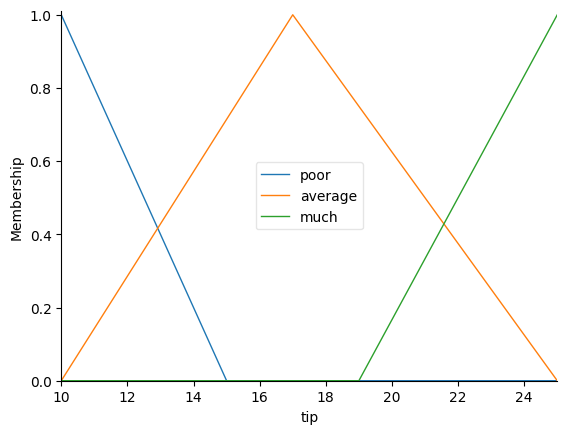

In [ ]:
tip.view()

In [ ]:
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['poor'])
rule2 = ctrl.Rule(food['normal'] & service['poor'], tip['poor'])
rule3 = ctrl.Rule(food['good'] & service['poor'], tip['average'])
rule4 = ctrl.Rule(food['poor'] & service['normal'], tip['poor'])
rule5 = ctrl.Rule(food['normal'] & service['normal'], tip['average'])
rule6 = ctrl.Rule(food['good'] & service['normal'], tip['much'])
rule7 = ctrl.Rule(food['poor'] & service['good'], tip['average'])
rule8 = ctrl.Rule(food['normal'] & service['good'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

20.926806630489516


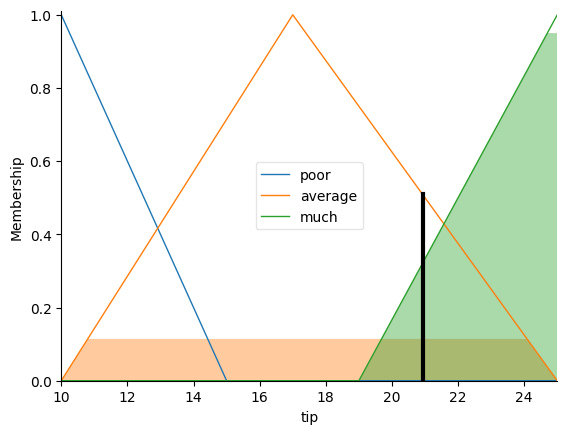

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 6.2
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)


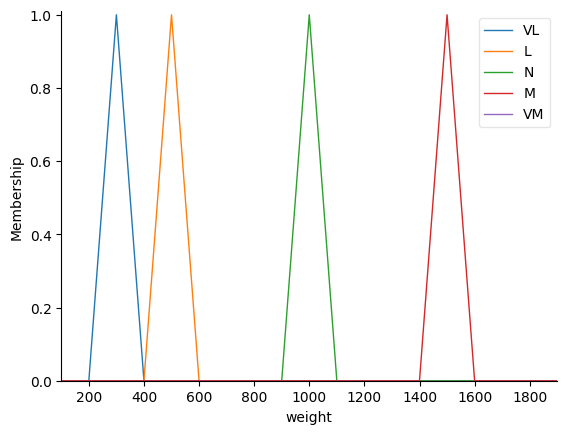

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight = ctrl.Antecedent(np.arange(100,2000,100),'weight')
time = ctrl. Antecedent(np.arange(10,180,10), 'time')
power = ctrl.Consequent(np.arange(0,100.25,0.25),'power')

weight['VL'] = fuzz.gaussmf(weight.universe,300,7)
weight['L'] = fuzz.gaussmf(weight.universe,500,7)
weight['N'] = fuzz.gaussmf(weight.universe,1000,7)
weight['M'] = fuzz.gaussmf(weight.universe,1500,7)
weight['VM'] = fuzz.gaussmf(weight.universe,2000,7)

time['VL'] = fuzz.gaussmf(time.universe,20,7)
time['L'] = fuzz.gaussmf(time.universe,50,7)
time['N'] = fuzz.gaussmf(time.universe,90,7)
time['M'] = fuzz.gaussmf(time.universe,120,7)
time['VM'] = fuzz.gaussmf(time.universe,180,7)



power['VL'] = fuzz.gaussmf(power.universe,10,7)
power['L'] = fuzz.gaussmf(power.universe,30,7)
power['M'] = fuzz.gaussmf(power.universe,50,7)
power['F'] = fuzz.gaussmf(power.universe,70,7)
power['VF'] = fuzz.gaussmf(power.universe,80,7)


weight.view()


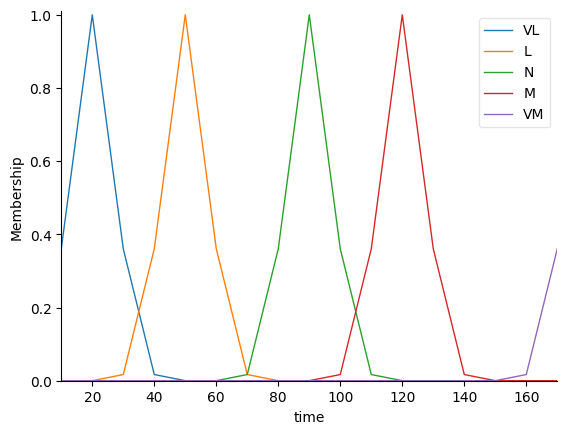

In [ ]:
time.view()

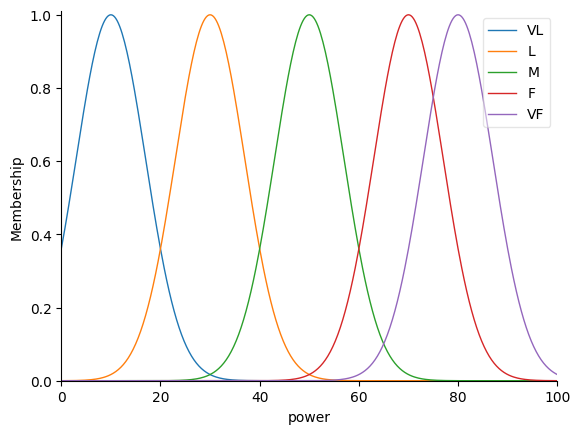

In [ ]:
power.view()

49.999999999999986


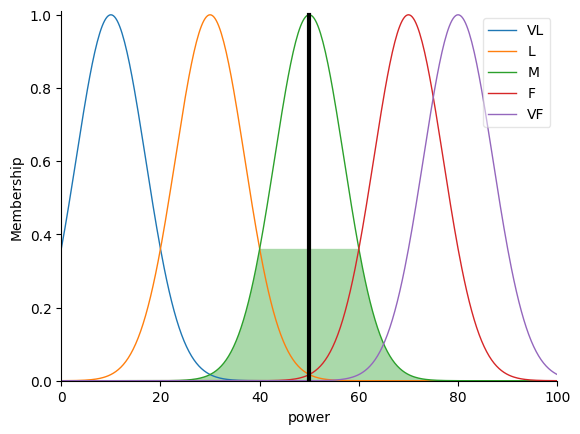

In [ ]:
rule1 = ctrl.Rule(weight['VL'] & time['VL'], power['VL'])
rule2 = ctrl.Rule(weight['VL'] & time['L'], power['VL'])
rule3 = ctrl.Rule(weight['VL'] & time['N'], power['VL'])
rule4 = ctrl.Rule(weight['VL'] & time['M'], power['VL'])
rule5 = ctrl.Rule(weight['VL'] & time['VM'], power['L'])
rule6 = ctrl.Rule(weight['L'] & time['VL'], power['L'])
rule7 = ctrl.Rule(weight['L'] & time['L'], power['L'])
rule8 = ctrl.Rule(weight['L'] & time['N'], power['L'])
rule9 = ctrl.Rule(weight['L'] & time['M'], power['M'])
rule10 = ctrl.Rule(weight['L'] & time['VM'], power['M'])
rule11 = ctrl.Rule(weight['N'] & time['VL'], power['M'])
rule12 = ctrl.Rule(weight['N'] & time['L'], power['M'])
rule13 = ctrl.Rule(weight['N'] & time['N'], power['M'])
rule14 = ctrl.Rule(weight['N'] & time['M'], power['M'])
rule15 = ctrl.Rule(weight['N'] & time['VM'], power['M'])
rule16 = ctrl.Rule(weight['M'] & time['VL'], power['F'])
rule17 = ctrl.Rule(weight['M'] & time['L'], power['F'])
rule18 = ctrl.Rule(weight['M'] & time['N'], power['F'])
rule19 = ctrl.Rule(weight['M'] & time['M'], power['F'])
rule20 = ctrl.Rule(weight['M'] & time['VM'], power['F'])
rule21 = ctrl.Rule(weight['VM'] & time['VL'], power['VF'])
rule22 = ctrl.Rule(weight['VM'] & time['L'], power['VF'])
rule23 = ctrl.Rule(weight['VM'] & time['N'], power['VF'])
rule24 = ctrl.Rule(weight['VM'] & time['M'], power['VF'])
rule25 = ctrl.Rule(weight['VM'] & time['VM'], power['VF'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['weight'] = 1000
powering.input['time'] = 60
powering.compute()
print(powering.output['power'])
power.view(sim = powering)


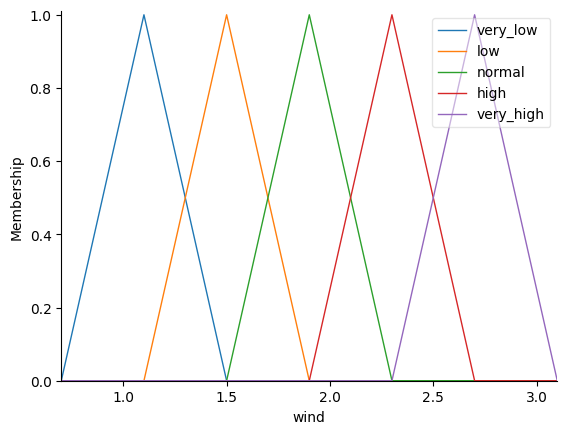

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

wind.view()


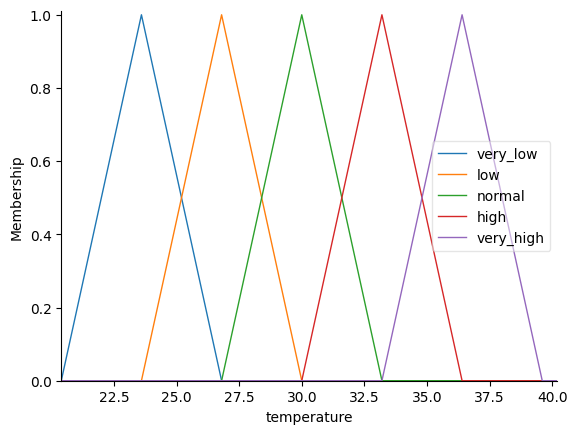

In [ ]:
temperature.view()

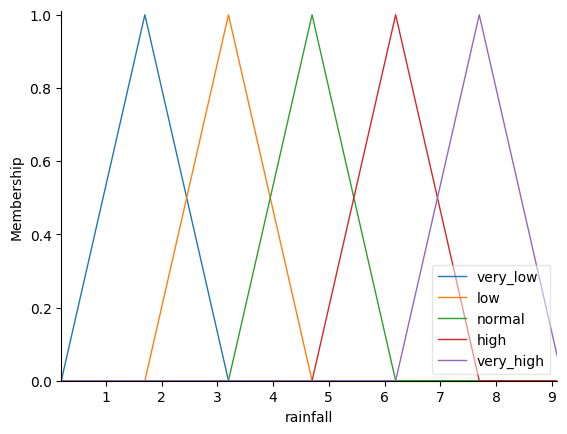

In [ ]:
rainfall.view()

2.408123588917386


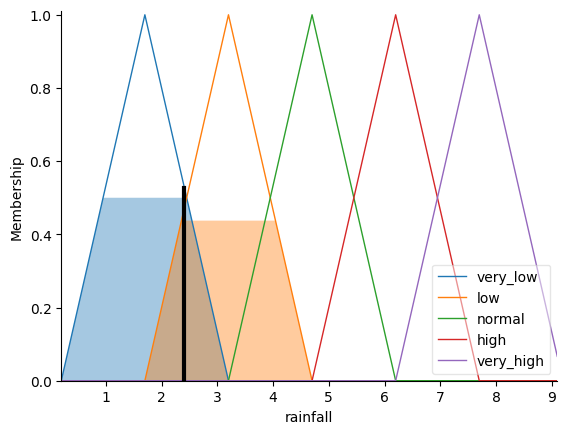

In [ ]:
rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['low'])
rule2 = ctrl.Rule(wind['low'] & temperature['very_low'], rainfall['low'])
rule3 = ctrl.Rule(wind['normal'] & temperature['very_low'], rainfall['normal'])
rule4 = ctrl.Rule(wind['high'] & temperature['very_low'], rainfall['high'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_low'], rainfall['very_high'])
rule6 = ctrl.Rule(wind['very_low'] & temperature['low'], rainfall['low'])
rule7 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
rule8 = ctrl.Rule(wind['normal'] & temperature['low'], rainfall['normal'])
rule9 = ctrl.Rule(wind['high'] & temperature['low'], rainfall['high'])
rule10 = ctrl.Rule(wind['very_high'] & temperature['low'], rainfall['very_high'])
rule11 = ctrl.Rule(wind['very_low'] & temperature['normal'], rainfall['very_low'])
rule12 = ctrl.Rule(wind['low'] & temperature['normal'], rainfall['very_low'])
rule13 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['low'])
rule14 = ctrl.Rule(wind['high'] & temperature['normal'], rainfall['normal'])
rule15 = ctrl.Rule(wind['very_high'] & temperature['normal'], rainfall['high'])
rule16 = ctrl.Rule(wind['very_low'] & temperature['high'], rainfall['very_low'])
rule17 = ctrl.Rule(wind['low'] & temperature['high'], rainfall['very_low'])
rule18 = ctrl.Rule(wind['normal'] & temperature['high'], rainfall['low'])
rule19 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['low'])
rule20 = ctrl.Rule(wind['very_high'] & temperature['high'], rainfall['low'])
rule21 = ctrl.Rule(wind['very_low'] & temperature['very_high'], rainfall['low'])
rule22 = ctrl.Rule(wind['low'] & temperature['very_high'], rainfall['low'])
rule23 = ctrl.Rule(wind['normal'] & temperature['very_high'], rainfall['very_low'])
rule24 = ctrl.Rule(wind['high'] & temperature['very_high'], rainfall['very_low'])
rule25 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_low'])


rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                       rule20, rule21, rule22, rule23, rule24, rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 2.5
rainfalling.input['temperature'] = 35
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)

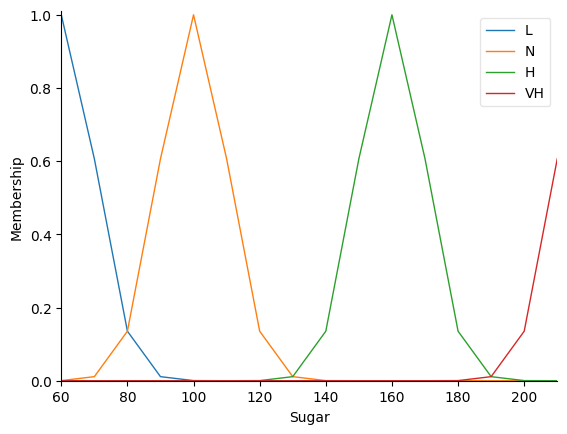

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Sugar = ctrl.Antecedent(np.arange(60,220,10),'Sugar')
BMI = ctrl.Antecedent(np.arange(18.5,30.5,0.5), 'BMI')
Frequent_urination = ctrl.Antecedent(np.arange(3,16,1),'Frequent_urination')
Fatigue = ctrl.Antecedent(np.arange(0,11,1),'Fatigue')
Risk = ctrl.Consequent(np.arange(0,10.5,0.5),'Risk')

Sugar['L'] = fuzz.gaussmf(Sugar.universe,60,10)
Sugar['N'] = fuzz.gaussmf(Sugar.universe,100,10)
Sugar['H'] = fuzz.gaussmf(Sugar.universe,160,10)
Sugar['VH'] = fuzz.gaussmf(Sugar.universe,220,10)

BMI['U'] = fuzz.gaussmf(BMI.universe,18,0.5)
BMI['N'] = fuzz.gaussmf(BMI.universe,22,0.5)
BMI['O'] = fuzz.gaussmf(BMI.universe,27,0.5)
BMI['OB'] = fuzz.gaussmf(BMI.universe,31,0.5)

Frequent_urination['R'] = fuzz.gaussmf(Frequent_urination.universe,3,2)
Frequent_urination['S'] = fuzz.gaussmf(Frequent_urination.universe,8,2)
Frequent_urination['O'] = fuzz.gaussmf(Frequent_urination.universe,15,2)

Fatigue ['L'] = fuzz.gaussmf(Fatigue.universe,3,1)
Fatigue ['M'] = fuzz.gaussmf(Fatigue.universe,6,1)
Fatigue ['H'] = fuzz.gaussmf(Fatigue.universe,10,1)


Risk['L'] = fuzz.gaussmf(Risk.universe,2,0.5)
Risk['M'] = fuzz.gaussmf(Risk.universe,4,0.5)
Risk['H'] = fuzz.gaussmf(Risk.universe,7,0.5)
Risk['VH'] = fuzz.gaussmf(Risk.universe,10,0.5)

Sugar.view()

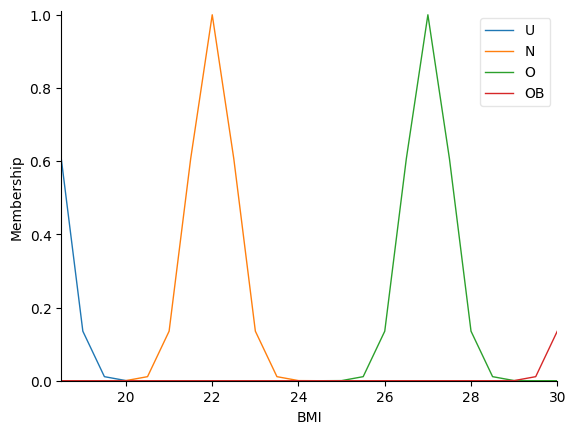

In [ ]:
BMI.view()

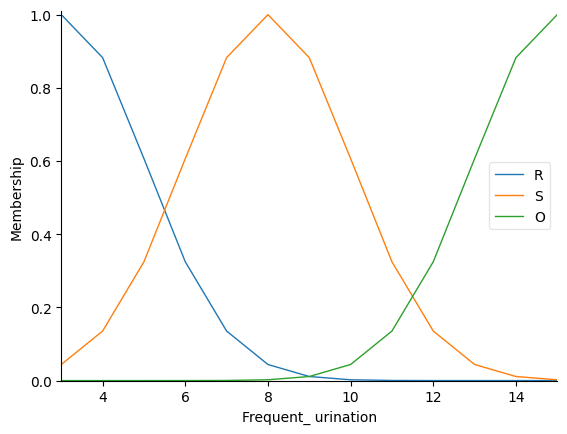

In [ ]:
Frequent_urination.view()

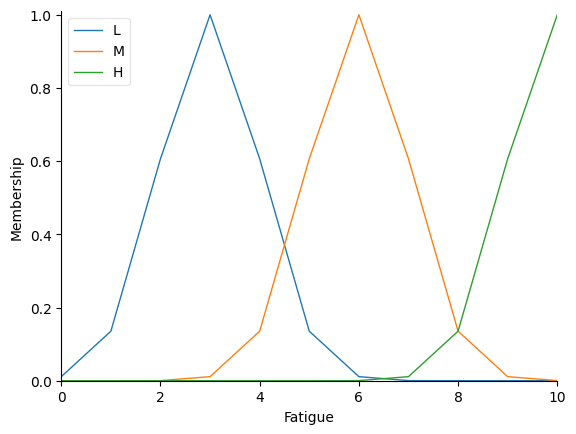

In [ ]:
Fatigue.view()

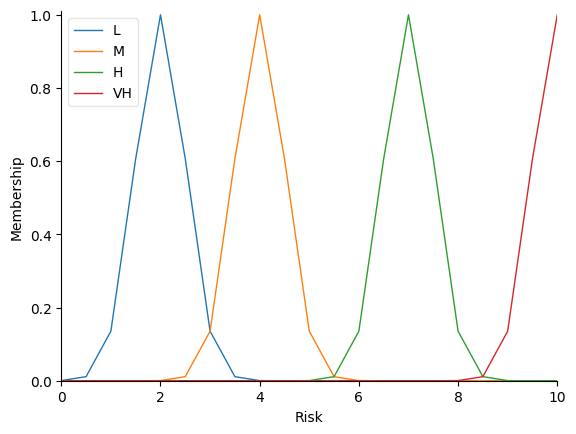

In [ ]:
Risk.view()

2.0001490525113934


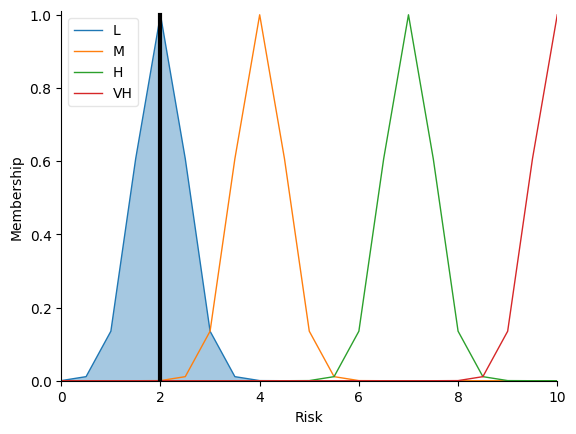

In [ ]:
rules = [
    ctrl.Rule(Sugar['VH'] & Frequent_urination['O'], Risk['VH']),
    ctrl.Rule(Sugar['VH'] & Frequent_urination['S'], Risk['H']),
    ctrl.Rule(Sugar['H'] & Frequent_urination['O'], Risk['H']),
    ctrl.Rule(Sugar['N'] & Frequent_urination['R'], Risk['L']),

    ctrl.Rule(Sugar['VH'] & BMI['OB'], Risk['VH']),
    ctrl.Rule(Sugar['VH'] & BMI['O'], Risk['H']),
    ctrl.Rule(Sugar['H'] & BMI['O'], Risk['H']),
    ctrl.Rule(Sugar['H'] & BMI['O'], Risk['M']),
    ctrl.Rule(Sugar['N'] & BMI['N'], Risk['L']),

    ctrl.Rule(Sugar['VH'] & Fatigue['H'], Risk['VH']),
    ctrl.Rule(Sugar['H'] & Fatigue['H'], Risk['H']),
    ctrl.Rule(Sugar['H'] & Fatigue['M'], Risk['M']),
    ctrl.Rule(Sugar['N'] & Fatigue['L'], Risk['L'])
]
risky_ctrl = ctrl.ControlSystem(rules)
risky = ctrl.ControlSystemSimulation(risky_ctrl)
risky.input['Sugar'] = 100
risky.input['BMI'] = 22
risky.input['Frequent_urination'] = 7
risky.input['Fatigue'] = 1
risky.compute()
print(risky.output['Risk'])
Risk.view(sim=risky)

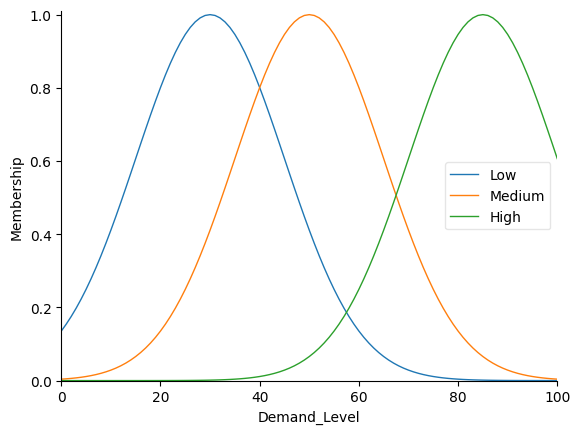

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand = ctrl.Antecedent(np.arange(0, 101, 1), 'Demand_Level')
competitor_price = ctrl.Antecedent(np.arange(5, 21, 1), 'Competitor_Pricing')
production_cost = ctrl.Antecedent(np.arange(3, 16, 1), 'Production_Cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Stock_Level')
final_price = ctrl.Consequent(np.arange(5, 26, 1), 'Final_Price')

demand['Low'] = fuzz.gaussmf(demand.universe, 30, 15)
demand['Medium'] = fuzz.gaussmf(demand.universe, 50, 15)
demand['High'] = fuzz.gaussmf(demand.universe, 85, 15)

competitor_price['Low'] = fuzz.gaussmf(competitor_price.universe, 8, 2)
competitor_price['Medium'] = fuzz.gaussmf(competitor_price.universe, 12, 2)
competitor_price['High'] = fuzz.gaussmf(competitor_price.universe, 18, 2)

production_cost['Low'] = fuzz.gaussmf(production_cost.universe, 5, 1)
production_cost['Medium'] = fuzz.gaussmf(production_cost.universe, 10, 1)
production_cost['High'] = fuzz.gaussmf(production_cost.universe, 14, 1)

seasonality['Off-Peak'] = fuzz.gaussmf(seasonality.universe, 2, 1)
seasonality['Normal'] = fuzz.gaussmf(seasonality.universe, 5, 1)
seasonality['Peak'] = fuzz.gaussmf(seasonality.universe, 8, 1)

stock_level['Low'] = fuzz.gaussmf(stock_level.universe, 30, 15)
stock_level['Medium'] = fuzz.gaussmf(stock_level.universe, 50, 15)
stock_level['High'] = fuzz.gaussmf(stock_level.universe, 90, 15)

final_price['Very_Low'] = fuzz.gaussmf(final_price.universe, 6, 1)
final_price['Low'] = fuzz.gaussmf(final_price.universe, 9, 1)
final_price['Medium'] = fuzz.gaussmf(final_price.universe, 15, 1)
final_price['High'] = fuzz.gaussmf(final_price.universe, 20, 1)
final_price['Very_High'] = fuzz.gaussmf(final_price.universe, 24, 1)

demand.view()


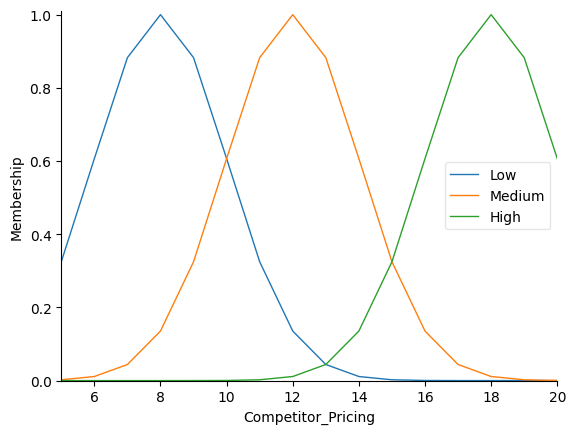

In [7]:
competitor_price.view()

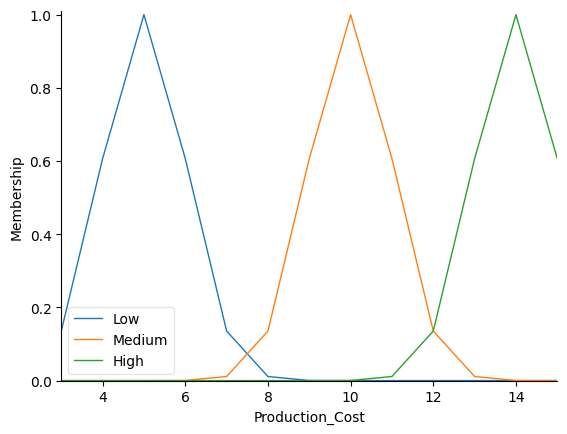

In [8]:
production_cost.view()

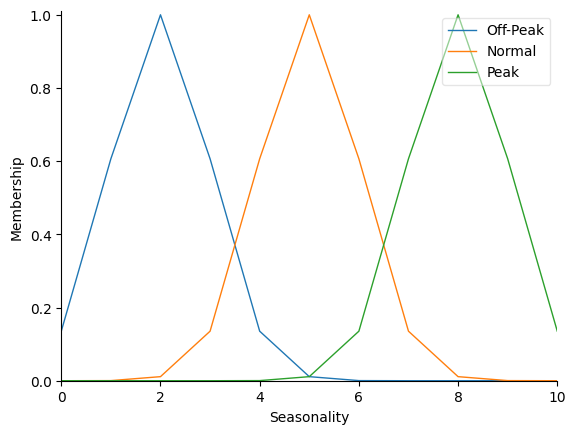

In [9]:
seasonality.view()

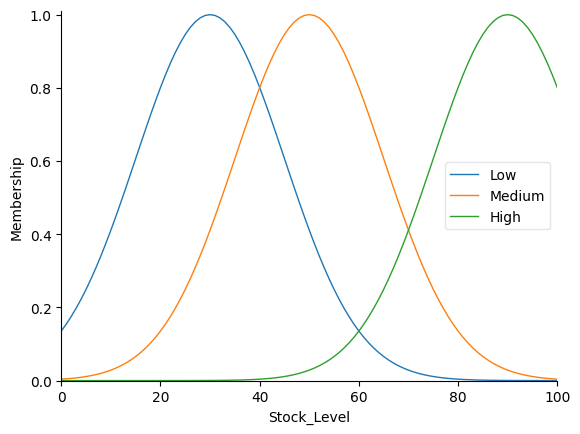

In [10]:
stock_level.view()

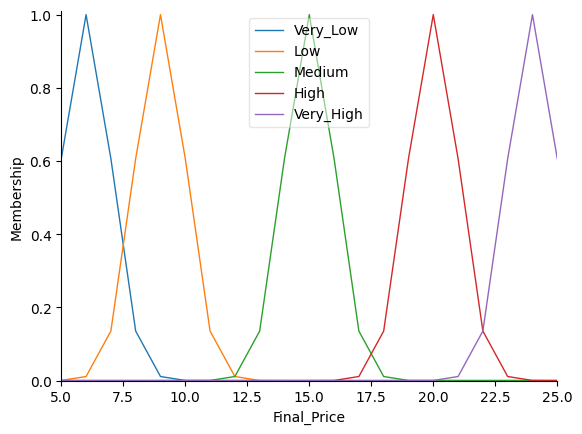

In [11]:
final_price.view()

Final Price: 20.88


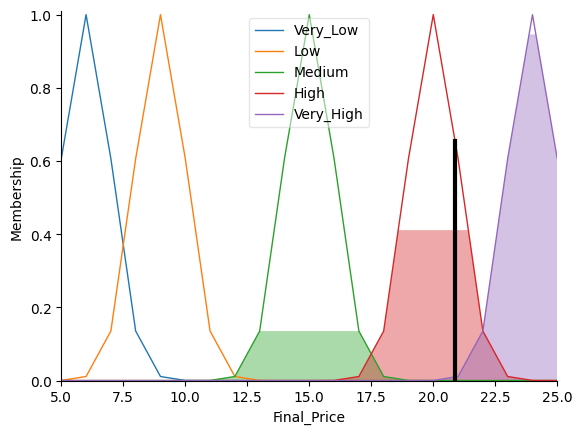

In [25]:
rules = [

    ctrl.Rule(demand['High'] & competitor_price['High'] & stock_level['Low'], final_price['Very_High']),
    ctrl.Rule(demand['High'] & seasonality['Peak'] & stock_level['Low'], final_price['Very_High']),
    ctrl.Rule(demand['Medium'] & production_cost['High'] & stock_level['Low'], final_price['Very_High']),


    ctrl.Rule(demand['High'] & competitor_price['Medium'] & stock_level['Medium'], final_price['High']),
    ctrl.Rule(demand['Medium'] & competitor_price['High'] & stock_level['Low'], final_price['High']),
    ctrl.Rule(demand['Medium'] & competitor_price['High'] & stock_level['Low'], final_price['High']),
    ctrl.Rule(demand['High'] & seasonality['Peak'] & stock_level['Medium'], final_price['High']),


    ctrl.Rule(demand['Medium'] & competitor_price['Medium'] & stock_level['Medium'], final_price['Medium']),
    ctrl.Rule(demand['Low'] & competitor_price['High'] & stock_level['Medium'], final_price['Medium']),
    ctrl.Rule(demand['Medium'] & production_cost['Medium'] & stock_level['Medium'], final_price['Medium']),


    ctrl.Rule(demand['Low'] & competitor_price['Low'] & stock_level['High'], final_price['Low']),
    ctrl.Rule(demand['Medium'] & production_cost['Low'] & stock_level['High'], final_price['Low']),
    ctrl.Rule(demand['Low'] & seasonality['Off-Peak'] & stock_level['High'], final_price['Low']),


    ctrl.Rule(demand['Low'] & competitor_price['Low'] & stock_level['High'], final_price['Very_Low']),  # Changed 'Very_Low' and 'Very_High' to 'Low' and 'High' respectively
    ctrl.Rule(demand['Low'] & seasonality['Off-Peak'] & stock_level['High'], final_price['Very_Low']),
    ctrl.Rule(demand['Medium'] & competitor_price['Low'] & stock_level['High'], final_price['Very_Low']),  # Changed 'Very_Low' and 'Very_High' to 'Low' and 'High' respectively
    ctrl.Rule(demand['Medium'] & competitor_price['Low'] & stock_level['High'], final_price['Very_Low']),
]

price_ctrl = ctrl.ControlSystem(rules)
price = ctrl.ControlSystemSimulation(price_ctrl)

price.input['Demand_Level'] = 80
price.input['Competitor_Pricing'] = 10
price.input['Production_Cost'] = 6
price.input['Seasonality'] = 8
price.input['Stock_Level'] = 30


price.compute()


print(f"Final Price: {price.output['Final_Price']:.2f}")


final_price.view(sim=price)

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load = ctrl.Antecedent(np.arange(0, 11, 1), 'Load')
dirt = ctrl.Antecedent(np.arange(0, 11, 1), 'Dirt_Level')
fabric = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_Type')
wash_time = ctrl.Consequent(np.arange(0, 11, 1), 'Wash_Time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'Water_Level')


load['Small'] = fuzz.trapmf(load.universe, [0, 0, 3, 4])
load['Medium'] = fuzz.trapmf(load.universe, [3, 4, 6, 7])
load['Large'] = fuzz.trapmf(load.universe, [6, 7, 10, 10])


dirt['Low'] = fuzz.trapmf(dirt.universe, [0, 0, 3, 4])
dirt['Medium'] = fuzz.trapmf(dirt.universe, [3, 4, 6, 7])
dirt['High'] = fuzz.trapmf(dirt.universe, [6, 7, 10, 10])


fabric['Delicate'] = fuzz.trapmf(fabric.universe, [0, 0, 3, 4])
fabric['Normal'] = fuzz.trapmf(fabric.universe, [3, 4, 6, 7])
fabric['Heavy'] = fuzz.trapmf(fabric.universe, [6, 7, 10, 10])


wash_time['Very Short'] = fuzz.trapmf(wash_time.universe, [0, 0, 2, 3])
wash_time['Short'] = fuzz.trapmf(wash_time.universe, [2, 3, 4, 5])
wash_time['Medium'] = fuzz.trapmf(wash_time.universe, [4, 5, 6, 7])
wash_time['Long'] = fuzz.trapmf(wash_time.universe, [6, 7, 8, 9])
wash_time['Very Long'] = fuzz.trapmf(wash_time.universe, [8, 9, 10, 10])


water_level['Low'] = fuzz.trapmf(water_level.universe, [0, 0, 3, 4])
water_level['Medium'] = fuzz.trapmf(water_level.universe, [3, 4, 6, 7])
water_level['High'] = fuzz.trapmf(water_level.universe, [6, 7, 10, 10])
water_level['Very High'] = fuzz.trapmf(water_level.universe, [8, 9, 10, 10])
load.view()




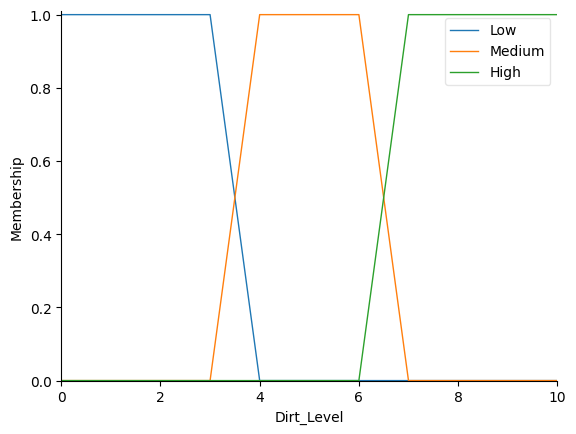

In [17]:
dirt.view()

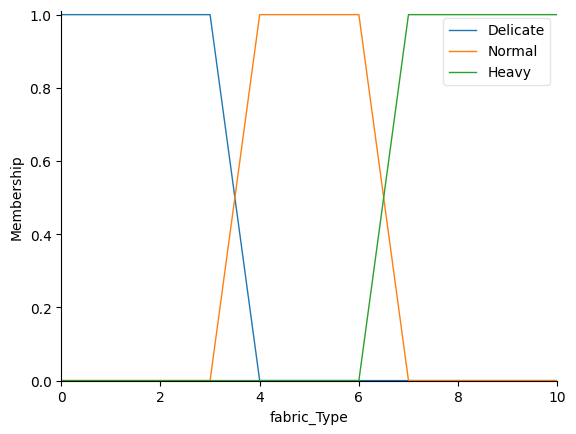

In [18]:
fabric.view()

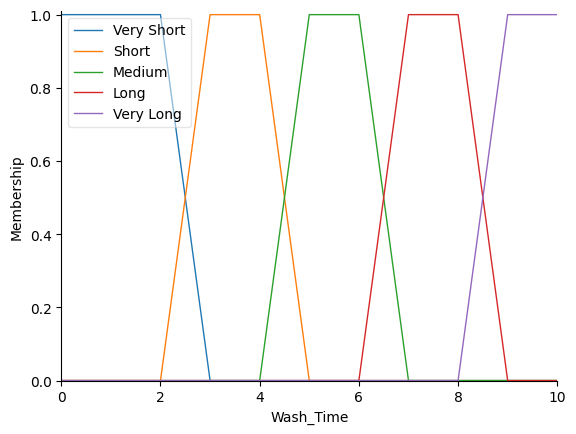

In [19]:
wash_time.view()

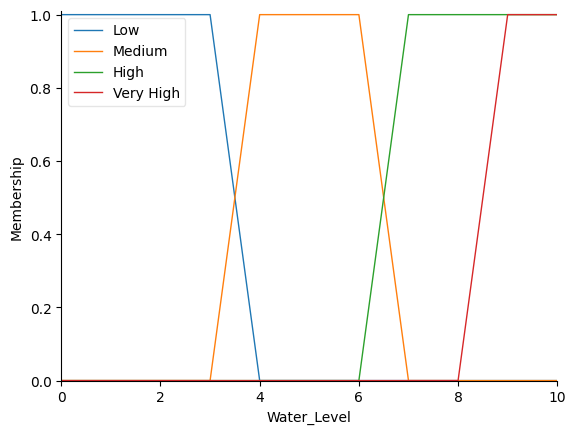

In [20]:
water_level.view()

Wash Time: 8.24
Water Level: 8.24


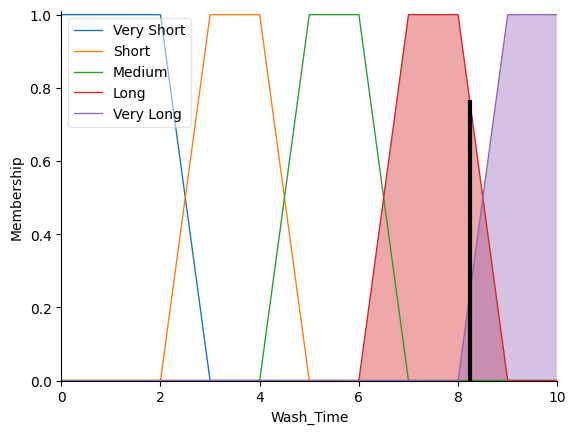

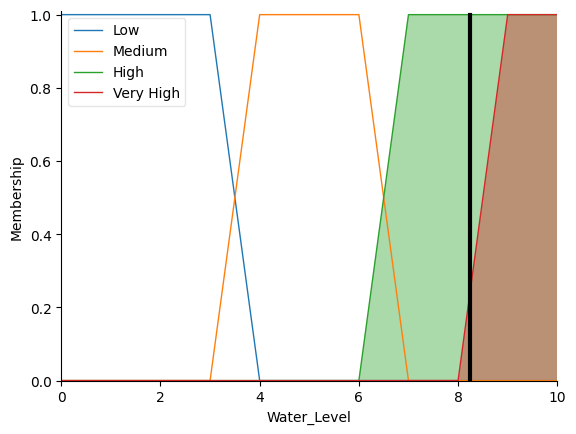

In [21]:
rules = [
    ctrl.Rule(load['Small'] & dirt['Low'], (wash_time['Short'], water_level['Low'])),
    ctrl.Rule(load['Small'] & dirt['Medium'], (wash_time['Medium'], water_level['Medium'])),
    ctrl.Rule(load['Small'] & dirt['High'], (wash_time['Long'], water_level['Medium'])),

    ctrl.Rule(load['Medium'] & dirt['Low'], (wash_time['Medium'], water_level['Medium'])),
    ctrl.Rule(load['Medium'] & dirt['Medium'], (wash_time['Long'], water_level['Medium'])),
    ctrl.Rule(load['Medium'] & dirt['High'], (wash_time['Long'], water_level['High'])),

    ctrl.Rule(load['Large'] & dirt['Low'], (wash_time['Medium'], water_level['High'])),
    ctrl.Rule(load['Large'] & dirt['Medium'], (wash_time['Long'], water_level['High'])),
    ctrl.Rule(load['Large'] & dirt['High'], (wash_time['Very Long'], water_level['Very High'])),

    ctrl.Rule(fabric['Delicate'], (wash_time['Short'], water_level['Low'])),
    ctrl.Rule(fabric['Normal'], (wash_time['Medium'], water_level['Medium'])),
    ctrl.Rule(fabric['Heavy'], (wash_time['Long'], water_level['High'])),

    ctrl.Rule(load['Large'] & dirt['High'] & fabric['Heavy'], (wash_time['Very Long'], water_level['Very High'])),
    ctrl.Rule(load['Small'] & dirt['Low'] & fabric['Delicate'], (wash_time['Very Short'], water_level['Low'])),
    ctrl.Rule(load['Medium'] & dirt['Medium'] & fabric['Normal'], (wash_time['Medium'], water_level['Medium']))
]


washing_ctrl = ctrl.ControlSystem(rules)
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)


washing_sim.input['Load'] = 7
washing_sim.input['Dirt_Level'] = 8
washing_sim.input['fabric_Type'] = 9


washing_sim.compute()
print(f"Wash Time: {washing_sim.output['Wash_Time']:.2f}")
print(f"Water Level: {washing_sim.output['Water_Level']:.2f}")


wash_time.view(sim=washing_sim)
water_level.view(sim=washing_sim)

Fan Speed: 6.29
Cooling Level: 6.65


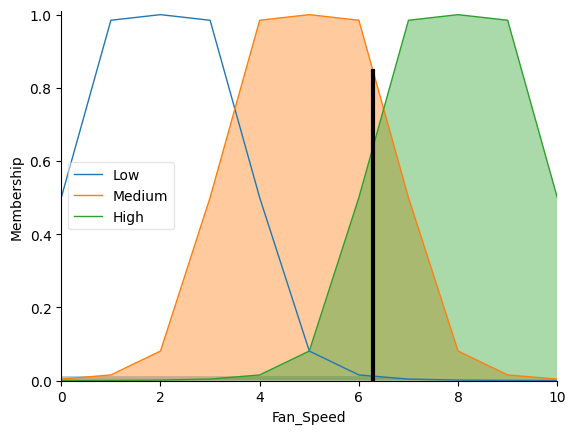

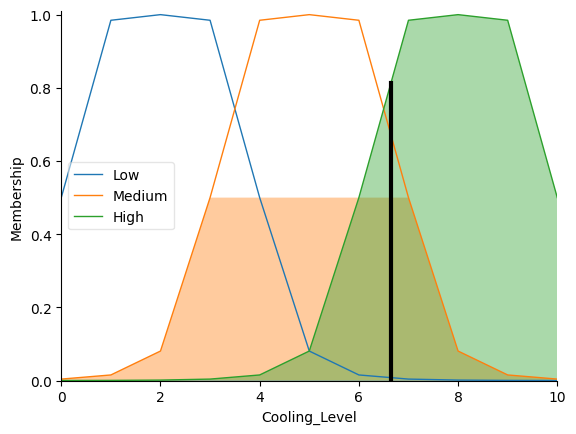

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'Temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'Humidity')
people = ctrl.Antecedent(np.arange(1, 11, 1), 'People')
fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'Fan_Speed')
cooling_level = ctrl.Consequent(np.arange(0, 11, 1), 'Cooling_Level')

temperature['Cold'] = fuzz.gbellmf(temperature.universe, 3, 4, 12)
temperature['Cool'] = fuzz.gbellmf(temperature.universe, 3, 4, 18)
temperature['Comfortable'] = fuzz.gbellmf(temperature.universe, 4, 4, 24)
temperature['Warm'] = fuzz.gbellmf(temperature.universe, 4, 4, 30)
temperature['Hot'] = fuzz.gbellmf(temperature.universe, 5, 4, 36)

humidity['Low'] = fuzz.gbellmf(humidity.universe, 10, 3, 30)
humidity['Medium'] = fuzz.gbellmf(humidity.universe, 10, 3, 60)
humidity['High'] = fuzz.gbellmf(humidity.universe, 10, 3, 90)

people['Few'] = fuzz.gbellmf(people.universe, 1, 2, 2)
people['Moderate'] = fuzz.gbellmf(people.universe, 1, 2, 5)
people['Many'] = fuzz.gbellmf(people.universe, 1, 2, 8)

fan_speed['Low'] = fuzz.gbellmf(fan_speed.universe, 2, 3, 2)
fan_speed['Medium'] = fuzz.gbellmf(fan_speed.universe, 2, 3, 5)
fan_speed['High'] = fuzz.gbellmf(fan_speed.universe, 2, 3, 8)

cooling_level['Low'] = fuzz.gbellmf(cooling_level.universe, 2, 3, 2)
cooling_level['Medium'] = fuzz.gbellmf(cooling_level.universe, 2, 3, 5)
cooling_level['High'] = fuzz.gbellmf(cooling_level.universe, 2, 3, 8)

rule1 = ctrl.Rule(temperature['Cold'], [fan_speed['Low'], cooling_level['Low']])
rule2 = ctrl.Rule(temperature['Cool'], [fan_speed['Low'], cooling_level['Low']])
rule3 = ctrl.Rule(temperature['Comfortable'], [fan_speed['Medium'], cooling_level['Medium']])
rule4 = ctrl.Rule(temperature['Warm'], [fan_speed['High'], cooling_level['High']])
rule5 = ctrl.Rule(temperature['Hot'], [fan_speed['High'], cooling_level['High']])

rule6 = ctrl.Rule(humidity['Low'], cooling_level['Low'])
rule7 = ctrl.Rule(humidity['Medium'], cooling_level['Medium'])
rule8 = ctrl.Rule(humidity['High'], cooling_level['High'])

rule9 = ctrl.Rule(people['Few'], fan_speed['Low'])
rule10 = ctrl.Rule(people['Moderate'], fan_speed['Medium'])
rule11 = ctrl.Rule(people['Many'], fan_speed['High'])

rule12 = ctrl.Rule(temperature['Hot'] & humidity['High'] & people['Many'], [fan_speed['High'], cooling_level['High']])
rule13 = ctrl.Rule(temperature['Comfortable'] & humidity['Medium'] & people['Moderate'], [fan_speed['Medium'], cooling_level['Medium']])
rule14 = ctrl.Rule(temperature['Cool'] & humidity['Low'] & people['Few'], [fan_speed['Low'], cooling_level['Low']])

ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

ac_sim.input['Temperature'] = 30
ac_sim.input['Humidity'] = 70
ac_sim.input['People'] = 5

ac_sim.compute()

print(f"Fan Speed: {ac_sim.output['Fan_Speed']:.2f}")
print(f"Cooling Level: {ac_sim.output['Cooling_Level']:.2f}")

fan_speed.view(sim=ac_sim)
cooling_level.view(sim=ac_sim)


Cooking Time: 20.00 minutes
Power Level: 55.07%


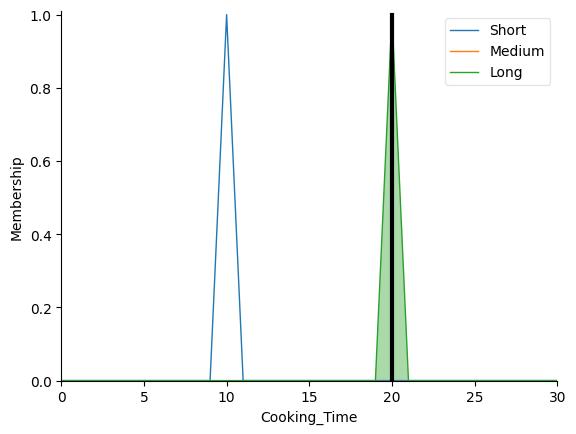

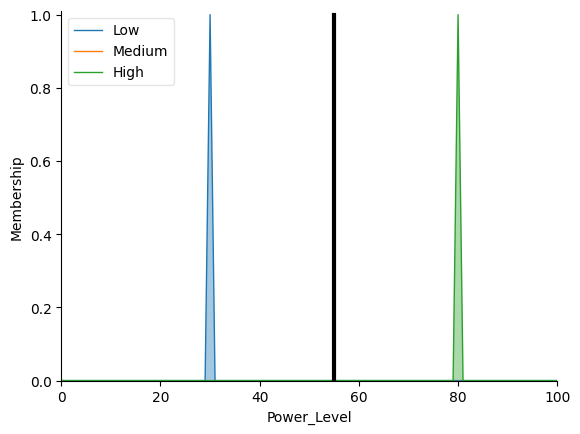

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'Food_Weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'Food_Type')
food_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'Food_Temperature')
cooking_time = ctrl.Consequent(np.arange(0, 31, 1), 'Cooking_Time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'Power_Level')

food_weight['Light'] = fuzz.gaussmf(food_weight.universe, 300, -0.02)
food_weight['Medium'] = fuzz.gaussmf(food_weight.universe, 500, 0.02) * fuzz.gaussmf(food_weight.universe, 700, -0.02)
food_weight['Heavy'] = fuzz.gaussmf(food_weight.universe, 700, 0.02)

food_type['Soft'] = fuzz.gaussmf(food_type.universe, 0, -5)
food_type['Medium'] = fuzz.gaussmf(food_type.universe, 1, 5)
food_type['Hard'] = fuzz.gaussmf(food_type.universe, 2, 5)

food_temp['Cold'] = fuzz.gaussmf(food_temp.universe, 10, -0.2)
food_temp['Warm'] = fuzz.gaussmf(food_temp.universe, 30, 0.2) * fuzz.gaussmf(food_temp.universe, 40, -0.2)
food_temp['Hot'] = fuzz.gaussmf(food_temp.universe, 40, 0.2)

cooking_time['Short'] = fuzz.gaussmf(cooking_time.universe, 10, -0.1)
cooking_time['Medium'] = fuzz.gaussmf(cooking_time.universe, 15, 0.1) * fuzz.gaussmf(cooking_time.universe, 20, -0.1)
cooking_time['Long'] = fuzz.gaussmf(cooking_time.universe, 20, 0.1)

power_level['Low'] = fuzz.gaussmf(power_level.universe, 30, -0.1)
power_level['Medium'] = fuzz.gaussmf(power_level.universe, 60, 0.1) * fuzz.gaussmf(power_level.universe, 80, -0.1)
power_level['High'] = fuzz.gaussmf(power_level.universe, 80, 0.1)

rule1 = ctrl.Rule(food_weight['Light'], cooking_time['Short'])
rule2 = ctrl.Rule(food_weight['Medium'], cooking_time['Medium'])
rule3 = ctrl.Rule(food_weight['Heavy'], cooking_time['Long'])

rule4 = ctrl.Rule(food_type['Soft'], power_level['Low'])
rule5 = ctrl.Rule(food_type['Medium'], power_level['Medium'])
rule6 = ctrl.Rule(food_type['Hard'], power_level['High'])

rule7 = ctrl.Rule(food_temp['Cold'], cooking_time['Long'])
rule8 = ctrl.Rule(food_temp['Warm'], cooking_time['Medium'])
rule9 = ctrl.Rule(food_temp['Hot'], cooking_time['Short'])

rule10 = ctrl.Rule(food_weight['Heavy'] & food_type['Hard'] & food_temp['Cold'],
                    (cooking_time['Long'], power_level['High']))
rule11 = ctrl.Rule(food_weight['Medium'] & food_type['Soft'] & food_temp['Warm'],
                    (cooking_time['Medium'], power_level['Low']))
rule12 = ctrl.Rule(food_weight['Light'] & food_type['Medium'] & food_temp['Hot'],
                    (cooking_time['Short'], power_level['Medium']))

microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
microwave_sim = ctrl.ControlSystemSimulation(microwave_ctrl)

microwave_sim.input['Food_Weight'] = 600
microwave_sim.input['Food_Type'] = 2
microwave_sim.input['Food_Temperature'] = 10

microwave_sim.compute()

print(f"Cooking Time: {microwave_sim.output['Cooking_Time']:.2f} minutes")
print(f"Power Level: {microwave_sim.output['Power_Level']:.2f}%")

cooking_time.view(sim=microwave_sim)
power_level.view(sim=microwave_sim)


Estimated Delivery Time: 7.958333333333334
Incentive Bonus: 8.142857142857142
Driver Performance Rating: 4.410526315789474


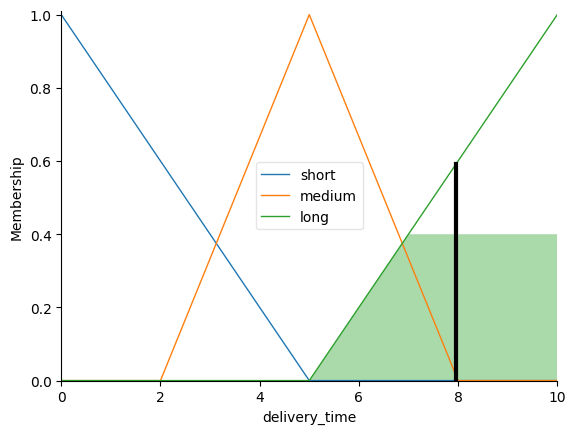

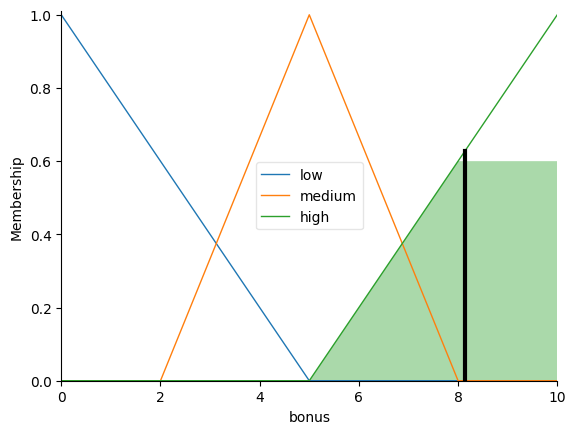

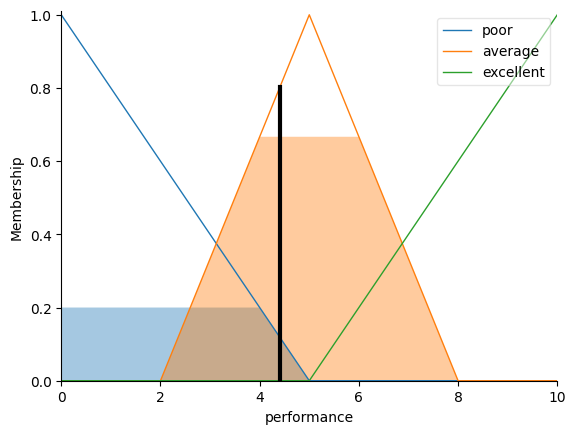

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 11, 1), 'weather')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')

delivery_time = ctrl.Consequent(np.arange(0, 11, 1), 'delivery_time')
bonus = ctrl.Consequent(np.arange(0, 11, 1), 'bonus')
performance = ctrl.Consequent(np.arange(0, 11, 1), 'performance')

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 5])
traffic['medium'] = fuzz.trimf(traffic.universe, [2, 5, 8])
traffic['high'] = fuzz.trimf(traffic.universe, [5, 10, 10])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['long'] = fuzz.trimf(distance.universe, [5, 10, 10])

weather['clear'] = fuzz.trimf(weather.universe, [0, 0, 5])
weather['rainy'] = fuzz.trimf(weather.universe, [2, 5, 8])
weather['stormy'] = fuzz.trimf(weather.universe, [5, 10, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 5])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [2, 5, 8])
fatigue['high'] = fuzz.trimf(fatigue.universe, [5, 10, 10])

delivery_time['short'] = fuzz.trimf(delivery_time.universe, [0, 0, 5])
delivery_time['medium'] = fuzz.trimf(delivery_time.universe, [2, 5, 8])
delivery_time['long'] = fuzz.trimf(delivery_time.universe, [5, 10, 10])

bonus['low'] = fuzz.trimf(bonus.universe, [0, 0, 5])
bonus['medium'] = fuzz.trimf(bonus.universe, [2, 5, 8])
bonus['high'] = fuzz.trimf(bonus.universe, [5, 10, 10])

performance['poor'] = fuzz.trimf(performance.universe, [0, 0, 5])
performance['average'] = fuzz.trimf(performance.universe, [2, 5, 8])
performance['excellent'] = fuzz.trimf(performance.universe, [5, 10, 10])

rule1 = ctrl.Rule(traffic['low'] & distance['short'], delivery_time['short'])
rule2 = ctrl.Rule(traffic['medium'] & distance['medium'], delivery_time['medium'])
rule3 = ctrl.Rule(traffic['high'] & distance['long'], delivery_time['long'])

rule4 = ctrl.Rule(weather['clear'], bonus['low'])
rule5 = ctrl.Rule(weather['rainy'], bonus['medium'])
rule6 = ctrl.Rule(weather['stormy'], bonus['high'])

rule7 = ctrl.Rule(fatigue['low'], performance['excellent'])
rule8 = ctrl.Rule(fatigue['medium'], performance['average'])
rule9 = ctrl.Rule(fatigue['high'], performance['poor'])

rule10 = ctrl.Rule(distance['long'] & weather['stormy'] & traffic['high'], [delivery_time['long'], bonus['high']])
rule11 = ctrl.Rule(distance['short'] & weather['clear'] & traffic['low'], [delivery_time['short'], bonus['low']])
rule12 = ctrl.Rule(fatigue['high'] & traffic['high'], [performance['poor'], delivery_time['long']])

system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
simulation = ctrl.ControlSystemSimulation(system)

simulation.input['traffic'] = 7
simulation.input['distance'] = 9
simulation.input['weather'] = 8
simulation.input['fatigue'] = 6


simulation.compute()

print("Estimated Delivery Time:", simulation.output['delivery_time'])
print("Incentive Bonus:", simulation.output['bonus'])
print("Driver Performance Rating:", simulation.output['performance'])

delivery_time.view(sim=simulation)
bonus.view(sim=simulation)
performance.view(sim=simulation)
